In [3]:
import pickle
import pandas as pd
with open("../2_p4_c5_GMX/10_contact/con_results.pkl", "rb") as PAC5_disFile:
    PAC5_dis = pickle.load(PAC5_disFile)
with open("../3_p4_rna_GMX/10_contact/con_results.pkl", "rb") as RNA_disFile:
    RNA_dis = pickle.load(RNA_disFile)
with open("../4_2p4_2dna_GMX/10_contact/con_results.pkl", "rb") as ssDNA_disFile:
    ssDNA_dis = pickle.load(ssDNA_disFile)

PAC5_ttFrame = [51, 287, 947]
PAC5_dis = PAC5_dis.iloc[PAC5_ttFrame]
PAC5_dis["frameNdx"] = "PAC5"

RNA_ttFrame = [282, 322, 669, 700, 934]
RNA_dis = RNA_dis.iloc[RNA_ttFrame]
RNA_dis["frameNdx"] = "RNA"

ssDNA_ttFrame = [60, 200, 368, 395]
ssDNA_dis = ssDNA_dis.iloc[ssDNA_ttFrame]
ssDNA_dis["frameNdx"] = "ssDNA"

ttclustDisMapDat = pd.concat([PAC5_dis, RNA_dis, ssDNA_dis], axis = 0)
frameNdx = ["5.1 ns", "28.7 ns", "94.7 ns",
            "28.2 ns", "32.2 ns", "66.9 ns", "70.0 ns", "93.4 ns",
            "6.0 ns", "20.0 ns", "36.8 ns", "39.5 ns"
            ]
ttclustDisMapDat

,15,16,17,18,19,20,21,22,23,24,...,185,186,187,188,189,190,191,192,193,frameNdx
51,12.841,10.971,8.369,4.834,2.301,8.276,9.068,4.395,5.359,2.265,...,15.877,7.826,14.280,9.196,14.068,13.677,16.847,15.024,10.757,PAC5
287,17.323,14.903,9.951,10.667,4.761,10.196,12.915,7.558,12.355,8.828,...,12.327,11.449,17.360,13.376,17.068,15.122,19.687,15.092,13.886,PAC5
947,18.421,15.018,12.615,10.282,4.581,9.584,10.391,6.366,6.524,2.280,...,16.423,10.333,17.910,18.425,17.969,20.794,25.084,25.099,26.622,PAC5
282,18.438,15.044,11.809,10.038,4.497,9.483,10.541,5.169,6.349,3.134,...,12.708,5.114,8.705,6.960,9.370,12.540,13.643,13.736,12.381,RNA
322,16.817,15.567,12.665,8.769,4.133,9.994,10.250,4.807,6.531,2.462,...,12.838,5.236,13.420,11.974,14.436,11.576,16.858,20.746,20.348,RNA
669,13.217,14.685,12.740,9.834,4.879,10.001,10.791,5.677,6.567,3.218,...,13.808,5.925,13.362,10.319,15.339,17.343,11.123,18.064,15.239,RNA
700,12.480,13.892,12.421,9.029,4.167,9.522,10.863,5.510,6.932,3.142,...,12.771,5.233,13.789,11.206,15.634,13.962,19.941,24.980,26.048,RNA
934,12.634,14.399,12.034,9.296,4.491,9.096,10.350,5.347,6.270,2.457,...,13.039,5.254,11.755,11.424,11.384,15.380,16.511,20.508,19.896,RNA
60,12.372,10.688,8.738,3.113,2.102,7.804,6.502,1.796,5.687,2.659,...,12.632,5.297,13.523,11.448,16.739,17.394,14.585,13.722,11.618,ssDNA
200,13.276,11.645,9.660,6.081,2.182,8.581,8.700,2.254,6.090,2.396,...,13.462,6.777,14.770,13.271,18.189,20.064,20.391,19.146,15.093,ssDNA


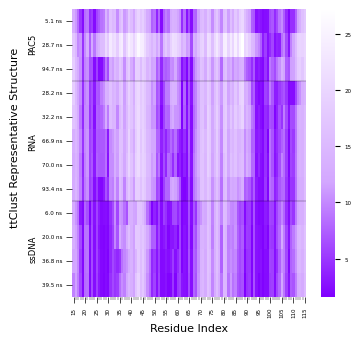

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

df = ttclustDisMapDat.iloc[:, 0:101]
# 创建自定义颜色映射
# 5以下颜色越小越深，大于等于5的白色
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap",
    [(0, "#8000FF"), (0.4, "#D3A7FF"), (1, "#ffffff")],
    N=512
)
#norm = mcolors.Normalize(vmin=0, vmax=5)
#cbar_kws={'ticks': []}

# 绘制热图
fig, ax = plt.subplots(figsize=(4.0, 3.5) )  # 设置图形大小
sns.heatmap(df, annot=False, cmap=cmap)#, norm=norm, fmt=".1f", cbar_kws=cbar_kws)  # 设置颜色条的标签
plt.xticks([x+0.5 for x in range(0, 101, 5)], range(15, 116, 5))
plt.yticks([x+0.5 for x in range(0,12)],frameNdx)
ax.tick_params(axis="x",reset=True, which="both", direction="out", width=0.5, length=4,labelsize=4,right=False,top=False,rotation=90)
ax.tick_params(axis="x", which="minor",reset=True, direction="out", width=0.3, length=2,zorder=1,right=False,top=False)
ax.tick_params(axis="y", which="major", direction="out", width=0.5, length=4, right=False,labelsize=4)
ax.tick_params(axis="y", which="minor", direction="out", width=0, length=2, right=False)
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
#for i in range(0, 100, 1):
#    ax.axhline(i, color='grey',linewidth=0.1)
    #ax2.axvline(i, color='black',linewidth=0.2)

plt.text(-19, 1.8,"PAC5", fontsize=6, rotation=90)
plt.text(-19, 5.8,"RNA", fontsize=6, rotation=90)
plt.text(-19, 10.5,"ssDNA", fontsize=6, rotation=90)
plt.text(-27, 9,"ttClust Representative Structure", fontsize=8, rotation=90)
#plt.text(1115, 46,'5Å ≥ d > 4Å', fontsize=4, rotation=-90)
#plt.text(1115, 71,'4Å ≥ d > 3Å', fontsize=4, rotation=-90)
#plt.text(1115, 92,'3Å ≥ d', fontsize=4, rotation=-90)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=4)  # 设置颜色条刻度的字体大小

plt.axhline(y=3, color='black', linewidth=0.2)
plt.axhline(y=8, color='black', linewidth=0.2)

plt.tight_layout(pad=1.5)
plt.ylabel(" ", fontsize=8)
plt.xlabel("Residue Index", fontsize=8)
plt.savefig("ttclustHeatMap.png", dpi=600)
plt.savefig("ttclustHeatMap.svg")
plt.show()
plt.close('all')
